In [51]:
#Importing the Libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
#%matplotlib.pylot as plot
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score


ModuleNotFoundError: No module named 'imblearn'

In [36]:
#Data Collection and Preparation
#Read The Data Set
df=pd.read_csv("E:\\NMDS\pl_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [38]:
#Data Collection and Preparation
#Read The Data Set
df1=pd.read_csv("E:\\NMDS\pl_test.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
df1.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 24.4+ KB


In [42]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [44]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [45]:
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])

In [46]:
#replacing + with space for filling the nan values
df['Dependents']=df['Dependents'].str.replace('+','')
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4764\1052807915.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents']=df['Dependents'].str.replace('+','')


In [47]:
#replacing + with space for filling the nan values
df1['Dependents']=df1['Dependents'].str.replace('+','')
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1['LoanAmount']=df1['LoanAmount'].fillna(df1['LoanAmount'].mode()[0])
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4764\1127294072.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Dependents']=df1['Dependents'].str.replace('+','')


In [48]:
#changing the data type of each float column to int
from numpy import int64
df['Gender']=df['Gender'].astype('int64')
df['Married']=df['Married'].astype(int64)
df['Dependents']=df['Dependents'].astype(int64)
df['Dependents']=df['Dependents'].astype(int64)
df['Self_Employed']=df['Self_Employed'].astype(int64)
df['CoapplicantIncome']=df['CoapplicantIncome'].astype(int64)
df['LoanAmount']=df['LoanAmount'].astype(int64)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(int64)
df['Credit_History']=df['Credit_History'].astype(int64)

ValueError: invalid literal for int() with base 10: 'Male'

In [49]:
#changing the data type of each float column to int
from numpy import int64
df1['Gender']=df1['Gender'].astype('int64')
df1['Married']=df1['Married'].astype(int64)
df1['Dependents']=df1['Dependents'].astype(int64)
df1['Dependents']=df1['Dependents'].astype(int64)
df1['Self_Employed']=df1['Self_Employed'].astype(int64)
df1['CoapplicantIncome']=df1['CoapplicantIncome'].astype(int64)
df1['LoanAmount']=df1['LoanAmount'].astype(int64)
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].astype(int64)
df1['Credit_History']=df1['Credit_History'].astype(int64)

ValueError: invalid literal for int() with base 10: 'Male'

In [50]:
#Balancing the dataset by using smote
from imbalance.combine import SMOTETomek
smote=SMOTETomek(0.90)


ModuleNotFoundError: No module named 'imbalance'

In [56]:
#dividing the dataset into dependent and independent y and x respectively
from imbalance.combine import SMOTETomek
smote=SMOTETomek(0.90)
y=df['Loan_Status']
x=df.drop(columns=['Loan_Status'],axis=1)
#creating a new x and y variables for the balanced set
x_bal,y_bal=smote.fit_resample(x,y)

ModuleNotFoundError: No module named 'imbalance'

In [58]:
#printing the values of y before balancing the data and after
print(y.value_counts())
print(y_bal.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


NameError: name 'y_bal' is not defined

In [59]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [60]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.321526,342.822888,0.839237
std,4910.685399,2334.232099,60.967295,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

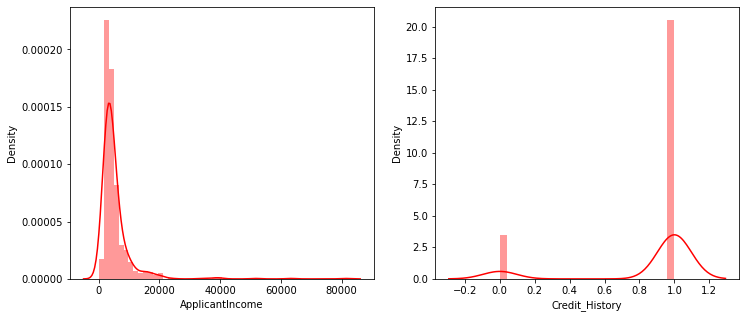

In [63]:
#Data Visualization using distplot
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(df['Credit_History'],color='r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

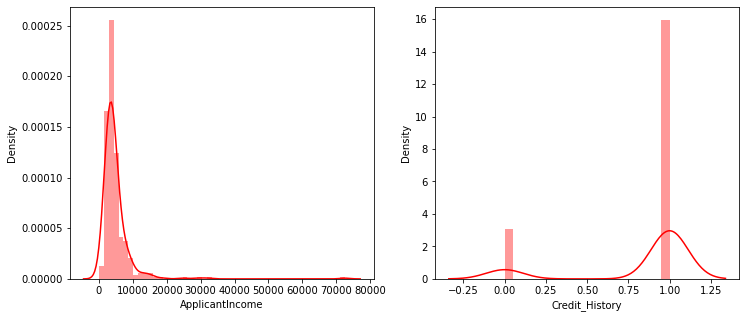

In [68]:
#Data Visualization using distplot
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(df1['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(df1['Credit_History'],color='r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

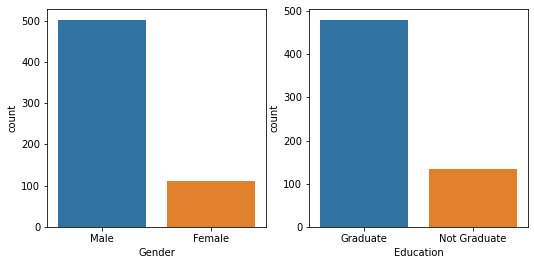

In [65]:
#Bivariate analysis
#Data Visualization using countplot
plt.figure(figsize = (18,4))
plt.subplot(1,4,1)
sns.countplot(df['Gender'])
plt.subplot(1,4,2)
sns.countplot(df['Education'])
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

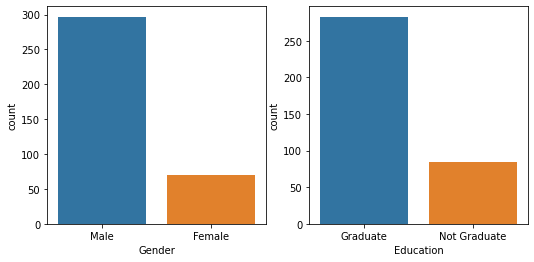

In [69]:
#Bivariate analysis
#Data Visualization using countplot
plt.figure(figsize = (18,4))
plt.subplot(1,4,1)
sns.countplot(df1['Gender'])
plt.subplot(1,4,2)
sns.countplot(df1['Education'])
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

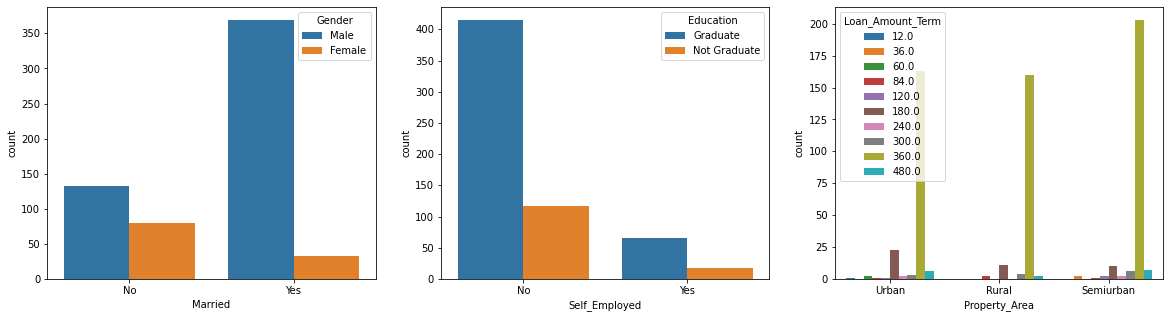

In [67]:
#Data Visualization using countplot
plt.figure(figsize = (20,5))
plt.subplot(131)
sns.countplot(df['Married'],hue=df['Gender'])
plt.subplot(132)
sns.countplot(df['Self_Employed'],hue=df['Education'])
plt.subplot(133)
sns.countplot(df['Property_Area'],hue=df['Loan_Amount_Term'])
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

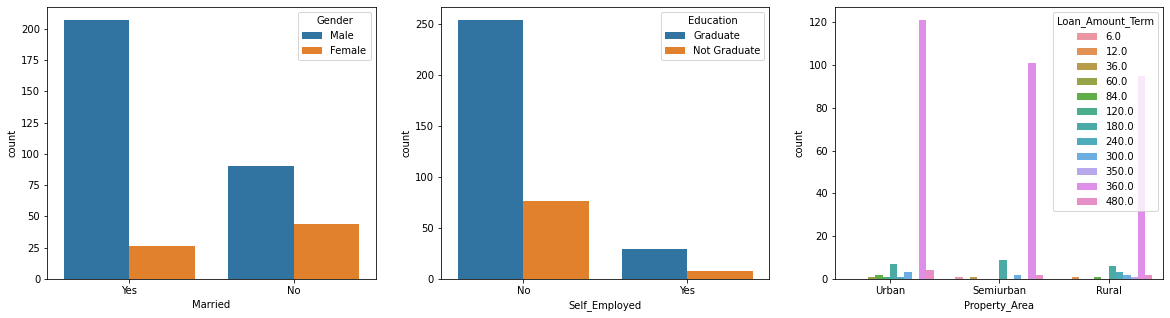

In [70]:
#Data Visualization using countplot
plt.figure(figsize = (20,5))
plt.subplot(131)
sns.countplot(df1['Married'],hue=df1['Gender'])
plt.subplot(132)
sns.countplot(df1['Self_Employed'],hue=df1['Education'])
plt.subplot(133)
sns.countplot(df1['Property_Area'],hue=df1['Loan_Amount_Term'])
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

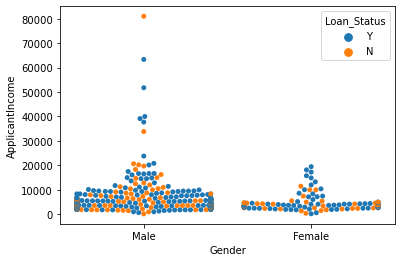

In [72]:
#visualized based gender and income what would be the application status
sns.swarmplot(df['Gender'],df['ApplicantIncome'],hue=df['Loan_Status'])

In [73]:
#Sclaing the Data 
#performing feature scaling operation using standard scaller an x part of the dataset
#because there different types of values in the columns
sc=StandardScalaer()
x_bal=sc.fit_transform(x_bal)
x_bal=pd.df(x_bal,columns=names)

NameError: name 'StandardScalaer' is not defined

In [74]:
#Splitting the Dataset in train and test on balanced dataset
X_train,X_test,y_train,y_test=train_test_split(x_bal,y_bal,test_size=0.33,random_state=42)

NameError: name 'x_bal' is not defined

In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

NameError: name 'X_train' is not defined

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)

SyntaxError: unexpected EOF while parsing (1019837826.py, line 2)

In [78]:
pip install graphviz

pip install pydotplus

SyntaxError: invalid syntax (3119523187.py, line 1)

In [79]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier()
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


In [83]:
dff=pd.read_csv("E:\\NMDS\pl_train.csv")
X = dff.iloc[:, [1, 2, 3]].values
y = dff.iloc[:, -1].values


In [86]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [87]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Male'

In [88]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


ValueError: could not convert string to float: 'Male'

In [89]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
 

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.